In [53]:
import ROOT
import root_numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [57]:
backtracks = []
for i in range(10):
    backtracks.append(root_numpy.root2array("129294.{p}.1.1000.cp.root".format(p=48+i), 
                                       treename="couples", 
                                       branches=["s.eX", "s.eY", "s.eZ",
                                                "s.eTX", "s.eTY",
                                                "s.eChi2"], step=1000))

s.eX/Y/Z - coordinates for base-track start  
s.eTX/Y  - angles between the track and planes OZX/OZY  
s.eChi2  - measure of error relative to a straight line, the lower the better  

Bricks' X/Y/Z dimensions: 12.4/9.9/7.5 cm

More precise formula for plates' Z-coordinate  
plate['s.eZ'] = p * 1293, p = 48 .. 57

In [59]:
h = 1293

In [90]:
X = []
Y = []
for i in range(len(backtracks)):
    X.append([])
    Y.append([])
    for params in backtracks[i]:
        X[i].append(params[0])
        Y[i].append(params[1])
for i in range(len(backtracks)):
    print('Brick #', i+1)
    print('X:', min(X[i]), '..', max(X[i]))
    print('Y:', min(Y[i]), '..', max(Y[i]))
    print()

Brick # 1
X: 28503.1601562 .. 71552.65625
Y: 3608.61474609 .. 76222.546875

Brick # 2
X: 28643.8535156 .. 71364.609375
Y: 4154.10498047 .. 76348.3515625

Brick # 3
X: 29057.6445312 .. 71591.015625
Y: 4242.38183594 .. 76386.9765625

Brick # 4
X: 28657.0546875 .. 71379.25
Y: 4707.25830078 .. 75840.015625

Brick # 5
X: 28473.2382812 .. 71599.3828125
Y: 4592.15380859 .. 76207.46875

Brick # 6
X: 28667.6425781 .. 71340.78125
Y: 3775.95507812 .. 76399.078125

Brick # 7
X: 28794.2929688 .. 71984.390625
Y: 3778.36499023 .. 76075.453125

Brick # 8
X: 28487.5253906 .. 71612.484375
Y: 3514.80932617 .. 76514.9609375

Brick # 9
X: 28672.1132812 .. 71390.7265625
Y: 3685.64160156 .. 76155.109375

Brick # 10
X: 12157.1035156 .. 113151.75
Y: 9680.08398438 .. 90608.0



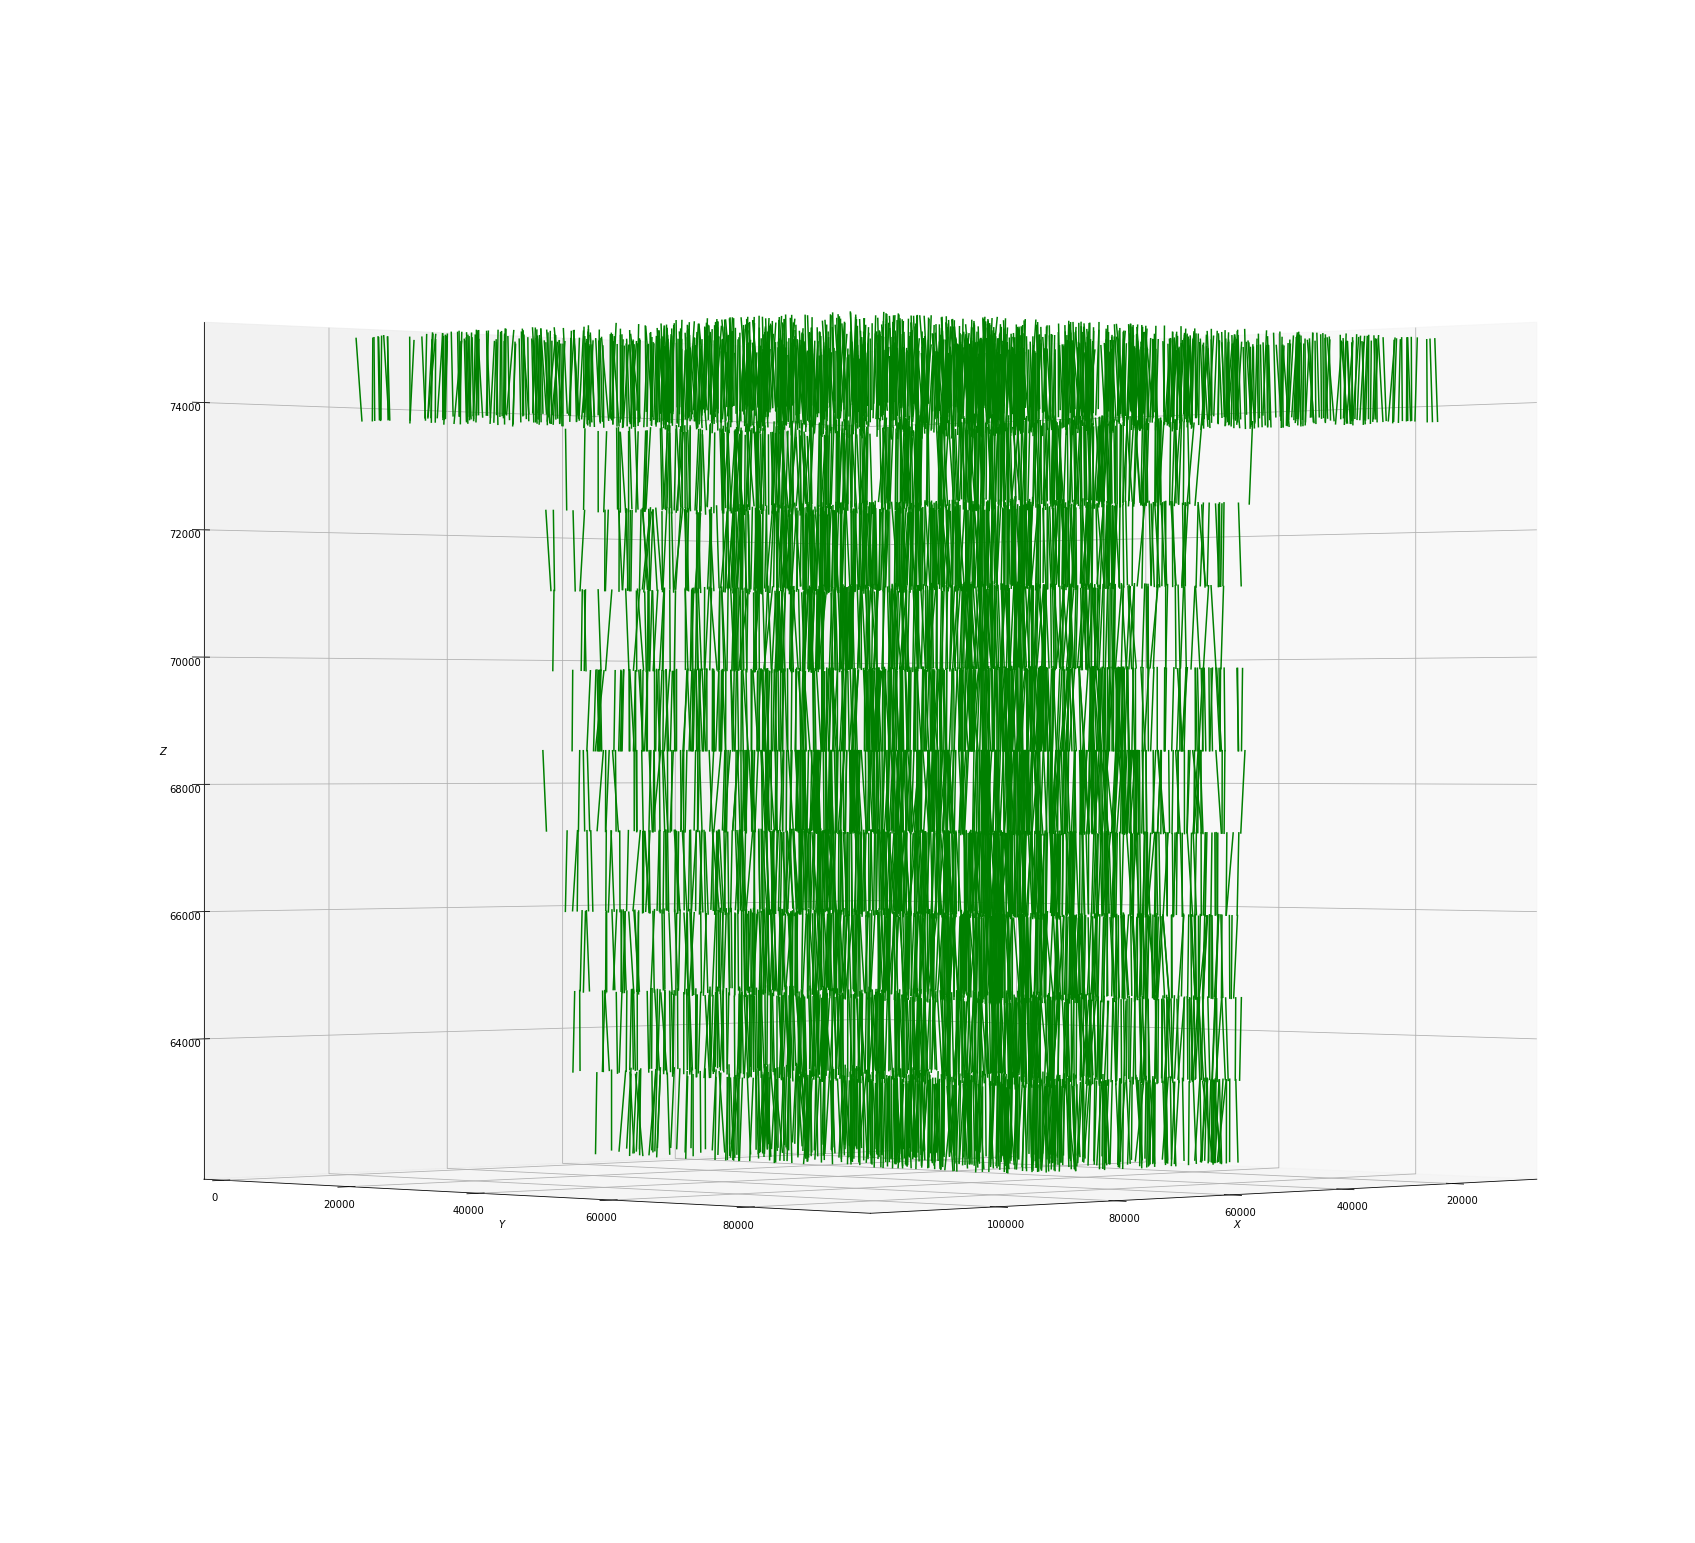

In [82]:
fig = plt.figure(figsize=(30,28))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'green')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.view_init(azim=45, elev=0)
plt.show()

Now we'll incorporate our data for known signals from the taue2 file:

In [87]:
mc = root_numpy.root2array("mcdata_taue2.root",
                        treename="Data",
                        branches=["BT_X", "BT_Y", "BT_Z",
                                   "BT_SX", "BT_SY",
                                   "chisquare"])

dtype=[('BT_X', 'O'), ('BT_Y', 'O'), ('BT_Z', 'O'), ('BT_SX', 'O'), ('BT_SY', 'O'), ('chisquare', 'O')]

BT_X/Y/Z === s.eX/Y/Z
BT_SX/Y  === s.eTX/Y  
chisquare === s.eChi2


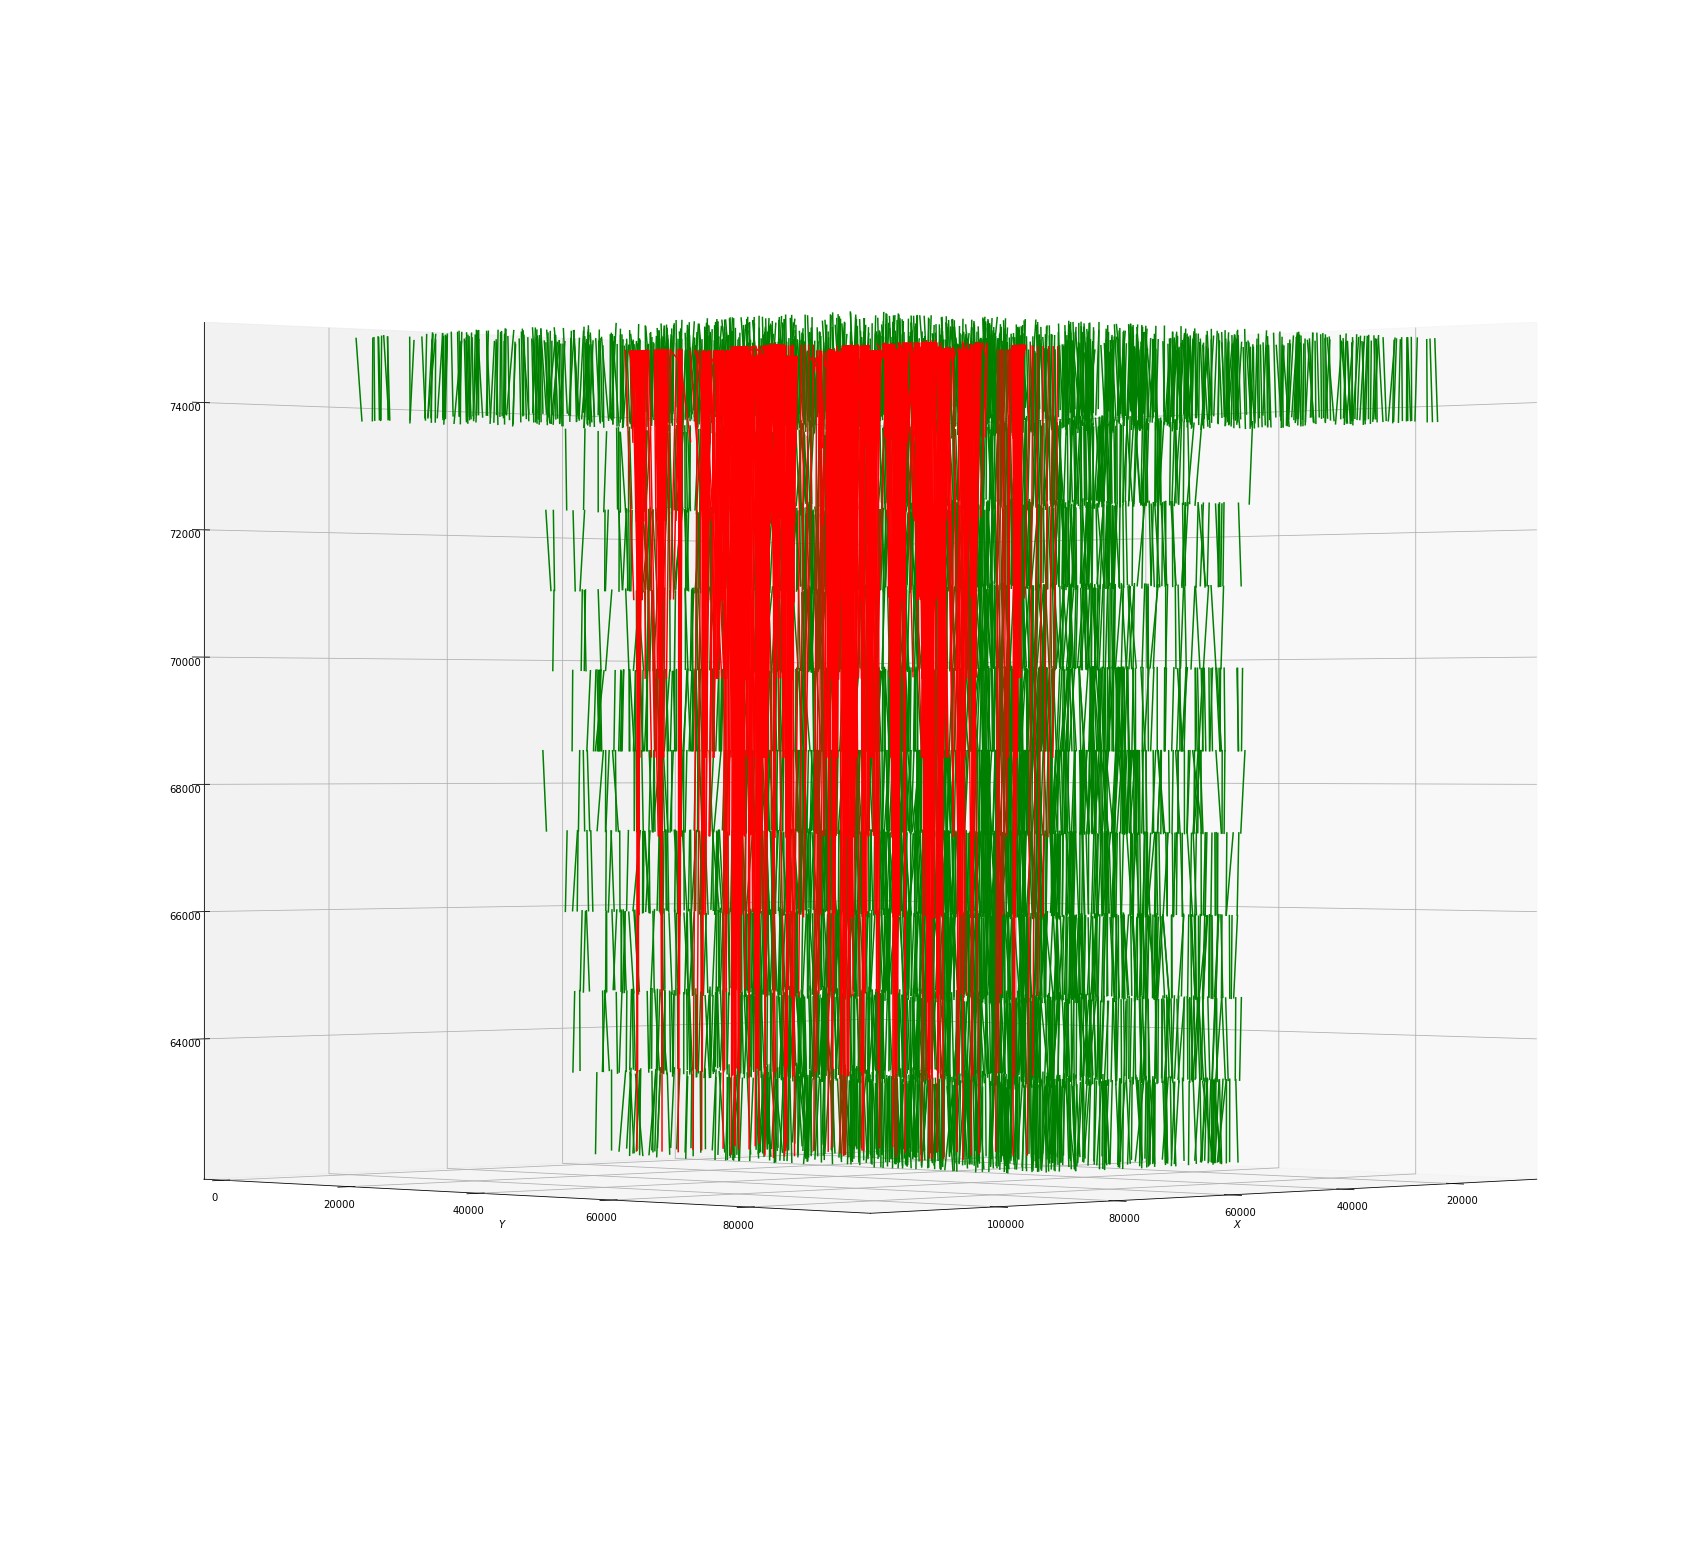

In [91]:
fig = plt.figure(figsize=(30,28))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'green')
for i in range(413):                                                 #right here we'll take the first ~400 tracks
    if len(mc[i][2]):
        hmin = h * 48 - min(mc[i][2])
    for j in range(len(mc[i][0])):
        if (mc[i][2][j] + hmin <= h * 58 
            and 28473.2382812 <= mc[i][0][j] <= 71340.78125 
            and 3514.80932617 <= mc[i][1][j] <= 75840.015625):
            x = [mc[i][0][j], np.tan(mc[i][3][j]) * h + mc[i][0][j]]
            y = [mc[i][1][j], np.tan(mc[i][4][j]) * h + mc[i][1][j]]
            z = [mc[i][2][j] + hmin, h * 58]
            ax.plot(x, y, z, 'red')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.view_init(azim=45, elev=0)
plt.show()


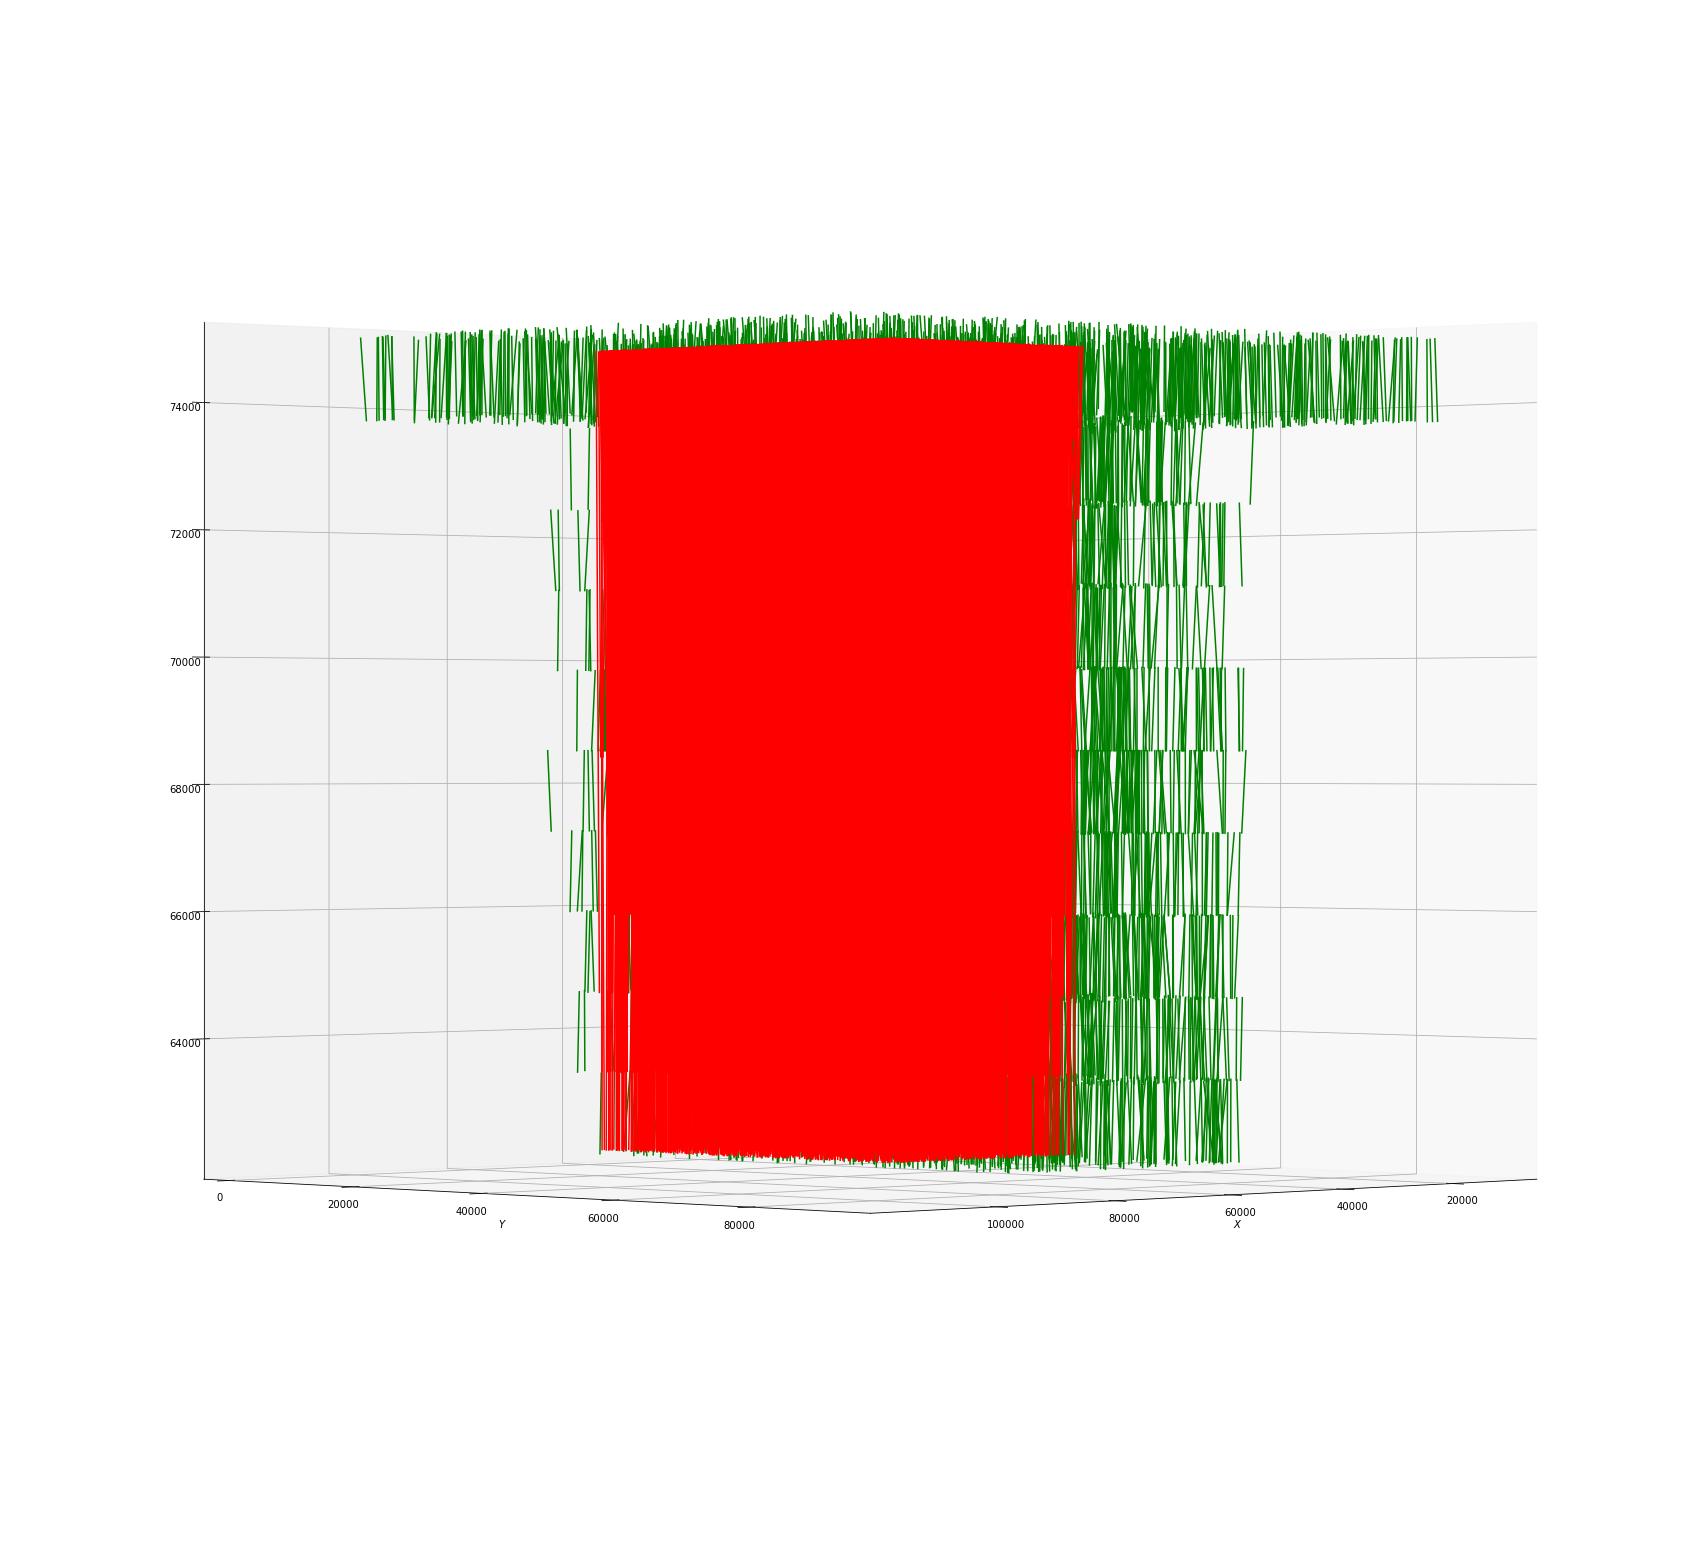

CPU times: user 4min 57s, sys: 3.08 s, total: 5min
Wall time: 5min 7s


In [93]:
%%time
fig = plt.figure(figsize=(30,28))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(backtracks)):
    for param in backtracks[i]:
        x = [param[0], np.tan(param[3]) * h + param[0]]
        y = [param[1], np.tan(param[4]) * h + param[1]]
        z = [h * (48 + i), h * (49 + i)]
        ax.plot(x, y, z, 'green')
for i in range(len(mc)):                                        #now we consider all the tracks. Let's observe
    if len(mc[i][2]):
        hmin = h * 48 - min(mc[i][2])
    for j in range(len(mc[i][0])):
        if (mc[i][2][j] + hmin <= h * 58 
            and 28473.2382812 <= mc[i][0][j] <= 71340.78125 
            and 3514.80932617 <= mc[i][1][j] <= 75840.015625):
            x = [mc[i][0][j], np.tan(mc[i][3][j]) * h + mc[i][0][j]]
            y = [mc[i][1][j], np.tan(mc[i][4][j]) * h + mc[i][1][j]]
            z = [mc[i][2][j] + hmin, h * 58]
            ax.plot(x, y, z, 'red')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.view_init(azim=45, elev=0)
plt.show()